In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import os
#import csv
import pandas as pd
import matplotlib 
import matplotlib.pylab as pylab
from mpl_toolkits.basemap import Basemap
import fiona
pylab.rcParams['figure.figsize'] = 12, 8
pd.options.display.mpl_style = 'default'
%matplotlib inline

In [2]:
# read in all files in current directory, assuming that they have the file struction nt.csv or nh.csv, eg 1t.csv, 13t.csv, 40h.csv, etc 
files = glob.glob('*[tT].csv') # read in names of data files 

meta = pd.DataFrame(pd.read_csv('bmoremetadata.csv', sep = ',')) # read in metadata 
meta = meta.set_index(meta['sensornumber']) # set the row names for metadata to be the sensor number

for index in meta.index: # loop over the sensor numbers in metadata and check if they are numbers
    try: 
        if str.isdigit(index)== 0: 
            meta = meta.drop(meta.loc[index]) # delete the rows without sensor numbers
    except (TypeError):
        pass
        
meta = meta.sort(axis=0) # sort the data in order of the sensor number 
meta = meta.set_index(meta['sensornumber'].astype(int))
# read in all the csv files into a Panda's dataframe, skipping the headers of the csv files
frames = []
sensornumbers = []
date_spec = {'Date': [ 0]}
for file in files: 
    try : 
        frames.append(pd.read_csv(file, sep = ',', skiprows = 19, parse_dates = date_spec, keep_date_col=True))
        sensornumbers.append(int(os.path.splitext(file)[0][0:-1]) )
    except ValueError: 
        print "oops... something went wrong"
    
data = pd.concat(frames, axis =1)

# Clean up data and build a new dataset
# next, normalize the dates: the sensors probably weren't set to all go off at the same time
# assume they all are within an hour of each other
maxStart = data['Date'].values[0,:].max() # the start time of the last sensor to start
minEndIndex = pd.isnull(data['Date']).any(1).nonzero()[0].min() # find the earliest row instance of Nans
maxEnd = data['Date'].values[minEndIndex-1,:].max() #picks the latest time in that row
rng = pd.date_range(maxStart, maxEnd, freq='H') # make a date range from maxStart to maxEnd, with hourly frequency

Temp = data['Value'].values[0:minEndIndex,:] #The temperature data 
clim = Temp.mean(axis=1) # the temperature 'climatology'
anomaly = Temp - np.tile(clim[:,np.newaxis], (1, Temp.shape[1])) # the anomaly data

# produces a data structure with time from variable rng as the rows and sensornumbers as the column heading
# the column 
tempDF = pd.DataFrame(data['Value'].values[0:minEndIndex,:], rng[:], sensornumbers).sort(axis=1)
anomalyDF = pd.DataFrame(anomaly, rng[:], sensornumbers).sort(axis=1)

#clean the metadata so that missing sensors don't mess with analysis
meta = meta.loc[np.intersect1d(tempDF.columns.values, meta.sensornumber.values)]

In [3]:
meta

,meta:instanceID,sensornumber,location:Latitude,location:Longitude,location:Altitude,location:Accuracy,direction,sunorshade,attachment,landcoverclass,picture,time,notes
sensornumber,,,,,,,,,,,,,
3,uuid:4641978c-05ea-45e1-bd17-aab2b8df7148,3,39.301997,-76.584437,0,5,0,partial,deadwood,impervious,https://bmorecoolodk.appspot.com/view/binaryDa...,Thu May 28 17:33:43 UTC 2015,Empty grass plot
4,uuid:4f88b3ea-3c6f-42d2-984b-67151eeb4230,4,39.300383,-76.583726,-18,5,0,partial,tree,impervious,https://bmorecoolodk.appspot.com/view/binaryDa...,Thu May 28 17:41:56 UTC 2015,nothingtoadd
5,uuid:c782bea0-dc38-4b7a-9831-182ad9e048a8,5,39.305295,-76.584112,10,3,0,partial,tree,impervious,https://bmorecoolodk.appspot.com/view/binaryDa...,Thu May 28 17:20:04 UTC 2015,nothingtoadd
7,uuid:8bb6652b-4206-4813-a315-1966f2b8152e,7,39.311264,-76.584415,24,5,0,partial,tree,impervious,https://bmorecoolodk.appspot.com/view/binaryDa...,Thu May 28 16:58:08 UTC 2015,nothingtoadd
9,uuid:cec834c1-073b-48e9-be8f-762af8f38d7f,9,39.286222,-76.583120,-45,5,0,shade,tree,grass,https://bmorecoolodk.appspot.com/view/binaryDa...,Thu May 28 16:46:02 UTC 2015,"Directly before Eastern Ave, before leaving park"
10,uuid:eb144c53-e413-4535-97ab-1336e87fd8a6,10,39.280966,-76.582620,-26,5,0,sun,metal,grass impervious,https://bmorecoolodk.appspot.com/view/binaryDa...,Thu May 28 17:07:04 UTC 2015,"Over tree, next to brick walkway close to water"
11,uuid:81a4961a-bc2a-4cbf-a13e-1a9df740d732,11,39.291143,-76.583364,-10,5,0,shade,tree,grass,https://bmorecoolodk.appspot.com/view/binaryDa...,Thu May 28 16:15:04 UTC 2015,Next to public works facility (red brick build...
12,uuid:fa93c0c0-2900-4c18-ad16-d9d55388d268,12,39.303825,-76.584303,2,5,0,partial,tree,grass,https://bmorecoolodk.appspot.com/view/binaryDa...,Thu May 28 17:25:17 UTC 2015,Pocket park
13,uuid:c47ccb0c-16df-447d-a199-d90fb4462848,13,39.299220,-76.583714,-1,5,0,partial,tree,impervious,https://bmorecoolodk.appspot.com/view/binaryDa...,Thu May 28 17:49:40 UTC 2015,nothingtoadd


ValueError: shapefile must have lat/lon vertices  - it looks like this one has vertices
in map projection coordinates. You can convert the shapefile to geographic
coordinates using the shpproj utility from the shapelib tools
(http://shapelib.maptools.org/shapelib-tools.html)

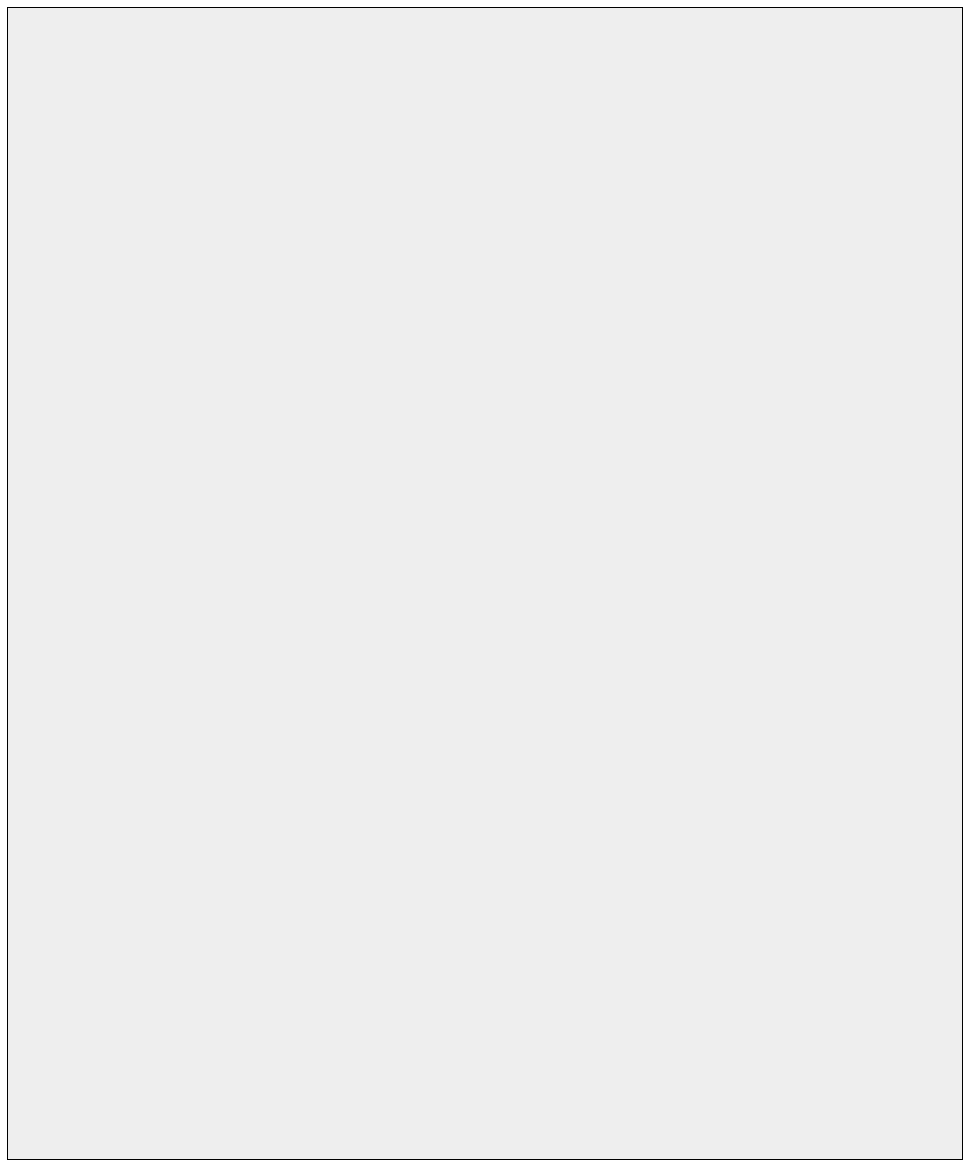

In [24]:
x = meta['location:Longitude'].values
y = meta['location:Latitude'].values
c = tempDF.mean(axis=0).values # The colors will show the mean temp at that location
marker_size = 100
fig = plt.figure(figsize=(20,20))
ax = fig.add_axes([0.1,0.1,0.8,0.8])

m = Basemap(llcrnrlon=meta['location:Longitude'].min()-.05,
            llcrnrlat=meta['location:Latitude'].min()-.05,
            urcrnrlon=meta['location:Longitude'].max()+.05,
            urcrnrlat=meta['location:Latitude'].max()+.05,
            projection='mill',
            #resolution ='l',
            #area_thresh=1000.
            )


m.drawmapboundary(zorder=0)
#m.drawcoastlines(zorder=0)
#m.drawstates(zorder=0)
#m.drawcounties()
m.readshapefile('./shapefiles/Baltimore_City_Line/baltcity_line', 'cityline')

celsius = m.scatter(x,y, s = marker_size, c = c[:], cmap = matplotlib.cm.RdBu_r, latlon = True)
cbar1 = m.colorbar(celsius, location = 'right', label = 'Temperature in $^\circ $C')

fahr = m.scatter(x,y, s = marker_size, c =(c[:]*9./5. + 32.), cmap = matplotlib.cm.RdBu_r, latlon = True)
cbar2 = m.colorbar(fahr, location = 'bottom', label = 'Temperature in $^\circ $F')

plt.title('Mean Temperature')
plt.show()

In [81]:
#%pylab qt
from matplotlib import pyplot
from descartes import PolygonPatch

from fiona import collection

# Set up the figure and axes.
BLUE = '#6699cc'
fig = pyplot.figure(1, figsize=(6, 6), dpi=90)
ax = fig.add_subplot(111)

# For each feature in the collection, add a patch to the axes.
with collection('./shapefiles/Land_Use/landuse.shp', "r") as input:
    for f in input:
        ax.add_patch(
            PolygonPatch(
                f['geometry'], fc=BLUE, ec=BLUE, alpha=0.5 ))

# Should be able to get extents from the collection in a future version
# of Fiona.
ax.set_xlim(meta['location:Longitude'].min(), meta['location:Longitude'].max())
ax.set_ylim(meta['location:Latitude'].min(), meta['location:Latitude'].max())
fig.savefig('test.png')

AssertionError: 

In [80]:
shape = fiona.open('./shapefiles/Land_Use/landuse.shp')
shape.meta

{'crs': {u'datum': u'NAD83',
  u'lat_0': 37.66666666666666,
  u'lat_1': 38.3,
  u'lat_2': 39.45,
  u'lon_0': -77,
  u'no_defs': True,
  u'proj': u'lcc',
  u'units': u'us-ft',
  u'x_0': 399999.9999999999,
  u'y_0': 0},
 'driver': u'ESRI Shapefile',
 'schema': {'geometry': 'Polygon',
  'properties': OrderedDict([(u'LU_2008', 'str:50'), (u'Shape_Leng', 'float:19.11'), (u'Shape_Area', 'float:19.11')])}}

In [ ]:
from fiona import collection
import matplotlib.pyplot as plt
from descartes import PolygonPatch
from matplotlib.collections import PatchCollection
from itertools import imap
from matplotlib.cm import get_cmap
%matplotlib inline

cm = get_cmap('Dark2')

figure, axes = plt.subplots(1)

source_path = './shapefiles/Water/water.shp'

with collection(source_path, 'r') as source:
    #patches = itertools.imap(PolygonPatch, MultiPolygon(record['geometry']))
    patches = imap(PolygonPatch, (record['geometry'] for record in source))

axes.add_collection( PatchCollection ( patches, cmap=cm, linewidths=0.1 ) )

#axes.set_xlim(-180,+180)
#axes.set_ylim(-90,90)

#ax.set_xlim(meta['location:Longitude'].min(), meta['location:Longitude'].max())
#ax.set_ylim(meta['location:Latitude'].min(), meta['location:Latitude'].max())
fig.savefig('test.png')